In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
iris = sns.load_dataset('iris')
# print(iris.head())

# sns.pairplot(iris, hue='species')

data = torch.tensor(iris[iris.columns[0:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [21]:
num_epochs = 100
num_hidden = 100

def create_iris_model(num_hidden):
    # num_hidden defines the variable number of units in hidden layer
    ANN_iris = nn.Sequential(
        nn.Linear(4, num_hidden), #input layer
        nn.ReLU(), 
        nn.Linear(num_hidden, num_hidden), # hidden layer
        nn.ReLU(),
        nn.Linear(num_hidden, 3)
    )

    lossfunc = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(ANN_iris.parameters(), lr=0.01)

    return ANN_iris, lossfunc, optimizer

ANN_iris, lossfunc, optimizer = create_iris_model(num_hidden)

In [22]:

def train_model(ANN):
    losses = torch.zeros(num_epochs)
    ongoingAcc = []

    for epoch in range(num_epochs):
        y_hat = ANN(data)

        loss = lossfunc(y_hat, labels)
        losses[epoch] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predications = ANN(data)

    predlabels = torch.argmax(predications, axis=1)
    return 100*torch.mean((predlabels==labels).float())

train_model(ANN_iris)


tensor(82.)

In [25]:
# run parametric experiment to determine effect of num_hidden
num_epochs = 150
num_hiddens = np.arange(1, 129)
accuracies = []

for num_units in num_hiddens:
    ANN_iris, lossfunc, optimizer = create_iris_model(num_units)

    acc = train_model(ANN_iris)
    accuracies.append(acc)


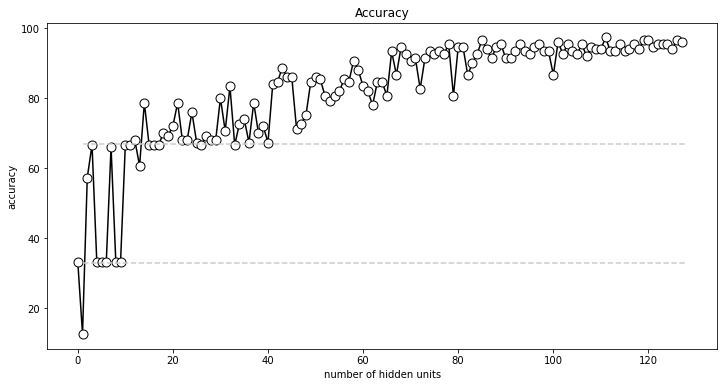

In [29]:
# accuracy report

fig, ax = plt.subplots(1, figsize=(12, 6))

ax.plot(accuracies, 'ko-', markerfacecolor='w', markersize=9)
ax.plot(num_hiddens[[0, -1]],[33,33], '--', color=[0.8, 0.8, 0.8])
ax.plot(num_hiddens[[0, -1]],[67, 67], '--', color=[0.8, 0.8, 0.8])
ax.set_xlabel('number of hidden units')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy')

plt.show()
